In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
from matplotlib import cm
from matplotlib import colors as c
from gqp_mc import data as Data 
from gqp_mc import fitters as Fitters

Adaptive Evaluation Step = 1000


In [3]:
specs,meta = Data.Spectra(sim='lgal',noise = 'none', lib = 'bc03', sample = 'mini_mocha')
photo, _ = Data.Photometry(sim='lgal', noise= 'none', lib='bc03', sample='mini_mocha') 
input_mass = meta['logM_total'][:10]

In [131]:
class convergence_plotter():
    def __init__(self,walkers,num_run,data_dir):
        self.num_walkers = walkers
        self.num_run = num_run
        self.data_dir = data_dir
        self.files = []
        
    def post(self):
        data = [x for x in self.files]
        
        return data
        
    def opener(self):
        f = [x for x in glob.glob(f'{self.data_dir}/*.hdf5')]  
        f.sort()
        print(f)
        files = []
        
        for i in f:
            file = h5py.File(i,'r')
            files.append(file)
        
        self.files = files
        return None
    
    def igal_walker_perc_plot(self,igal, spec_photo,step=1000, flag = "", cl = False, ylim = False):
        import seaborn as sns
        data = [x['mcmc_chain'][...][:,0] for x in self.files]
        num_gal = len(data)
        
        for sample,idx in zip(data,range(num_gal)):
            if igal == idx:
    #             plt.figure(figsize=(12,9))
                plt.xlabel('$N_{iteration}$')
                plt.ylabel('Median')
                plt.grid()
                plt.title(f'{spec_photo} galaxy {idx + 1} walker-percentile plot{flag}')
                plt.axhline(input_mass[idx], lw = 1, c = 'r')
                plt.text(1000,input_mass[idx],f'{input_mass[idx]}')
                if ylim:
                    plt.ylim(ylim)
                #plt.xlim(-10000,None)

                colors = plt.cm.copper(np.linspace(0,1,self.num_walkers))            
                for i in range(self.num_walkers):
                    y,up_perc,lo_perc = [], [], []
                    length = len(sample)//self.num_walkers
                    inc = length//step
                    x_axis = (np.arange(inc)+1)*step
                    for n in range(inc):
                        walker_sample = sample[i:step * (1+n):self.num_walkers]
                        up = np.percentile(walker_sample,84.1)
                        lo = np.percentile(walker_sample,15.9)
                        med = np.median(walker_sample)
                        up_perc.append(up-med)
                        lo_perc.append(med-lo)
                        y.append(med)

                    yerr = np.vstack((up_perc,lo_perc))
                    if cl:
                        color, label = cl
                        if i is not 0: label = ""
                        plt.plot(x_axis,y,lw = 0.5,c = color, label = label)#colors[i])
                    else:
                        plt.plot(x_axis,y,lw = 0.5,c = 'grey')#colors[i])
#                     plt.fill_between(x_axis, np.array(y)-np.array(lo_perc), np.array(y)+np.array(up_perc),color='gray', alpha=0.05)

    #             plt.savefig(f'Walker-Percentile plot galaxy {idx+1}{flag}.pdf', format = 'pdf')
    #             plt.show()
    
    def walker_perc_plot(self,spec_photo,step=1000, flag = "", cl = False, igal = None):
        import seaborn as sns
        data = [x['mcmc_chain'][...][:,0] for x in self.files]
        num_gal = len(data)
        
        for sample,idx in zip(data,range(num_gal)):
            plt.figure(figsize=(12,9))
            plt.xlabel('$N_{iteration}$')
            plt.ylabel('Median')
            plt.grid()
            plt.title(f'{spec_photo} galaxy {idx + 1} walker-percentile plot{flag}')
            plt.axhline(input_mass[idx], lw = 1, c = 'r')
            plt.text(1000,input_mass[idx],f'{input_mass[idx]}')
            #plt.xlim(-10000,None)
            
            colors = plt.cm.copper(np.linspace(0,1,self.num_walkers))            
            for i in range(self.num_walkers):
                y,up_perc,lo_perc = [], [], []
                length = len(sample)//self.num_walkers
                inc = length//step
                x_axis = (np.arange(inc)+1)*step
                for n in range(inc):
                    walker_sample = sample[i:step * (1+n):self.num_walkers]
                    up = np.percentile(walker_sample,84.1)
                    lo = np.percentile(walker_sample,15.9)
                    med = np.median(walker_sample)
                    up_perc.append(up-med)
                    lo_perc.append(med-lo)
                    y.append(med)
                    
                yerr = np.vstack((up_perc,lo_perc))
                if cl:
                    color, label = cl
                    if i is not 0: label = ""
                    plt.plot(x_axis,y,lw = 0.5,c = color, label = label)#colors[i])
                else:
                    plt.plot(x_axis,y,lw = 0.5,c = 'grey')#colors[i])
                plt.fill_between(x_axis, np.array(y)-np.array(lo_perc), np.array(y)+np.array(up_perc),color='gray', alpha=0.05)
                
            plt.savefig(f'Walker-Percentile plot galaxy {idx+1}{flag}.pdf', format = 'pdf')
            plt.show()
    
    def avg_perc_plot(self,spec_photo,step=1000):
        data = [x['mcmc_chain'][...][:,0] for x in self.files]
        num_gal = len(data)
        perc_err = []
        
        for sample,idx in zip(data,range(num_gal)):
            y,up_perc,lo_perc = [], [], []
            length = len(sample)
            inc = length//step
            x_axis = (np.arange(inc)+1)*step
            for n in range(inc):
                up = np.percentile(sample[:step*(1+n)],84.1)
                lo = np.percentile(sample[:step*(1+n)],15.9)
                med = np.median(sample[:step*(1+n)])
                up_perc.append(up-med)
                lo_perc.append(med-lo)
                y.append(med)
            
            yerr = np.vstack((up_perc,lo_perc))    
            plt.figure(figsize=(12,9))
            plt.xlabel('$N_{iteration}$')
            plt.ylabel('Median')
            plt.grid()
            plt.title(f'{spec_photo} galaxy {idx+1} percentile plot')
            plt.axhline(input_mass[idx], lw = 1, c = 'r')
            plt.text(1000,input_mass[idx],f'{input_mass[idx]}')
            plt.text(length,y[-1],f'{y[-1]}')
            plt.errorbar(x_axis,y,yerr=yerr,fmt = '.k', ecolor = 'gray', elinewidth=1,capsize=1)
            plt.xlim(-10000,None)
            plt.savefig(f'Percentile plot galaxy {idx+1}.pdf', format = 'pdf')
            plt.show()
            perc_err.append(100*(y[-1]-input_mass[idx])/input_mass[idx])
        return perc_err
    
    def hist_plot(self,spec_photo,step=1000):
        data = [x['mcmc_chain'][...][:,0] for x in self.files]
        num_gal=len(data)
            
        for sample,idx in zip(data,range(num_gal)):
            length = len(sample)
            inc = length//step
            colors = plt.cm.copper_r(np.linspace(0,1,inc))
            plt.figure(figsize=(12,9))
            for n in range(inc):
                hist = plt.hist(sample[:(1+n)*step],bins=50,histtype='step',color=colors[n],density='True',linewidth=1.2)

            plt.xlabel('$log M*$')
            plt.ylabel('Frequency')
            plt.title(f'{spec_photo } galaxy {idx+1} histogram')
            norm = c.Normalize(vmin=1,vmax=length) #Upper and lower boundaries for the color bar
            cbar = plt.colorbar(cm.ScalarMappable(norm = norm, cmap=cm.copper_r))
            plt.show()
                      
        return None
    
    def GRD3(self,sample):
        M = self.num_walkers
        N = len(sample)//M
        r_sample = []
        for idx in range(self.num_walkers):
            r_sample.append(sample[idx::self.num_walkers])
        means = []
        sq_means = []
        
        for m in r_sample:

            means.append(np.mean(m))
            sq_means.append(np.mean(m**2))
            
        tot_mean = np.mean(means)
        B = N*np.sum((means-tot_mean)**2)/(M-1)
        W = np.sum(sq_means-np.square(means))/M
        p_var = W*(N-1)/N+(M+1)*B/(M*N)
        PSRF = p_var/W

        return PSRF
    
    def GRD2(self,sample):
        M = self.num_walkers
        N = len(sample)//M
        r_sample = []
        for idx in range(self.num_walkers):
            r_sample.append(sample[idx::self.num_walkers])
        means = []
        sq_means = []
        
        for m in r_sample:

            means.append(np.mean(m))
            sq_means.append(np.mean(m**2))
            
        tot_mean = np.mean(means)
        B = N*np.sum((means-tot_mean)**2)/(M-1)
        W = np.sum(sq_means-np.square(means))/M
        p_var = W*(N-1)/N+(M+1)*B/(M*N)
        PSRF = p_var/W

        return PSRF
    
        
    def GRD(self,sample):
        M = self.num_walkers
        N = len(sample)//M
        r_sample = np.reshape(sample,(M,N))
        means = [] #For E(X)
        sq_means = [] #For E(X^2)

        for m in r_sample:
            means.append(np.mean(m))
            sq_means.append(np.mean(m**2))

        tot_mean = np.mean(means)
        B = N*np.sum((means-tot_mean)**2)/(M-1)
        W = np.sum(sq_means-np.square(means))/M
        p_var = W*(N-1)/N+(M+1)*B/(M*N)
        PSRF = p_var/W


        return PSRF
    
    def igal_PSRF_plot(self,igal,spec_photo,flag = "", cl = False, step=1000):
        data = [x['mcmc_chain'][...][:,0] for x in self.files]
        num_gal = len(data)

        for sample,idx in zip(data,range(num_gal)):
            if igal == idx:
                PSRFs = []
                length = len(sample)
                inc = length//step
                x_axis = np.arange(inc)*step
                for n in range(inc):
                    PSRFs.append(self.GRD2(sample[:(1+n)*step]))

                if cl: color = cl
                else: color = 'k'
                plt.plot(x_axis,PSRFs, lw = 2, label = flag,c = color)
                plt.axhline(1.1, c = 'r', ls = '--', lw = 1)
                plt.ylim(0,None)
                plt.xlim(0,None)
                plt.grid()
                plt.xlabel('$N_{iteration}$')
                plt.ylabel('Potential Scale Reduction Factor (PSRF)')
                plt.title(f'{spec_photo} galaxy {idx+1} PSRF plot')
#             plt.savefig(f'{spec_photo} galaxy {idx+1} PSRF plot.pdf', format = 'pdf')


    def PSRF_plot(self,spec_photo,step=1000):
        data = [x['mcmc_chain'][...][:,0] for x in self.files]
        num_gal = len(data)

        for sample,idx in zip(data,range(num_gal)):
            PSRFs = []
            length = len(sample)
            inc = length//step
            x_axis = np.arange(inc)*step
            plt.figure(figsize=(12,9))
            for n in range(inc):
                PSRFs.append(self.GRD2(sample[:(1+n)*step]))
            
            plt.plot(x_axis,PSRFs, c = 'k', lw = 2)
            plt.axhline(1.1, c = 'r', ls = '--', lw = 1)
            plt.ylim(0,None)
            plt.xlim(0,None)
            plt.grid()
            plt.xlabel('$N_{iteration}$')
            plt.ylabel('Potential Scale Reduction Factor (PSRF)')
            plt.title(f'{spec_photo} galaxy {idx+1} PSRF plot')
#             plt.savefig(f'{spec_photo} galaxy {idx+1} PSRF plot.pdf', format = 'pdf')
            plt.show()
 
    def PSRF_plot2(self,spec_photo,step=1000):
        data = [x['mcmc_chain'][...][:,0] for x in self.files]
        num_gal = len(data)

        for sample,idx in zip(data,range(num_gal)):
            PSRFs = []
            length = len(sample)
            inc = length//step
            x_axis = np.arange(inc)*step
            plt.figure(figsize=(12,9))
            for n in range(inc):
                PSRFs.append(self.GRD2(sample[:(1+n)*step]))
            
            plt.plot(x_axis,PSRFs, c = 'k', lw = 2)
            plt.axhline(1.1, c = 'r', ls = '--', lw = 1)
            plt.ylim(1.0,None)
            plt.xlim(0,None)
            plt.grid()
            plt.xlabel('$N_{iteration}$')
            plt.ylabel('Potential Scale Reduction Factor (PSRF)')
            plt.title(f'{spec_photo} galaxy {idx+1} PSRF plot')
#             plt.savefig(f'{spec_photo} galaxy {idx+1} PSRF plot.pdf', format = 'pdf')
            plt.show()
            
x1 = convergence_plotter(20,80000,'/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/scattering_magnitude_test3/1e-4/')
x1.opener()
x10 = convergence_plotter(20,80000,'/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/scattering_magnitude_test3/10e-4/')
x10.opener()
x15 = convergence_plotter(20,80000,'/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/scattering_magnitude_test3/15e-4/')
x15.opener()

['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/scattering_magnitude_test3/1e-4/lgal.specphoto.noise_none.vanilla.0.hdf5', '/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/scattering_magnitude_test3/1e-4/lgal.specphoto.noise_none.vanilla.1.hdf5', '/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/scattering_magnitude_test3/1e-4/lgal.specphoto.noise_none.vanilla.2.hdf5', '/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/scattering_magnitude_test3/1e-4/lgal.specphoto.noise_none.vanilla.3.hdf5', '/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/scattering_magnitude_test3/1e-4/lgal.specphoto.noise_none.vanilla.4.hdf5', '/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/scattering_magnitude_test3/1e-4/lgal.specphoto.noise_none.vanilla.5.hdf5', '/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/scattering_magnitude_test3/1e-4/lgal.specphoto.noise_none.vanilla.6.hdf5', '/Users/jame

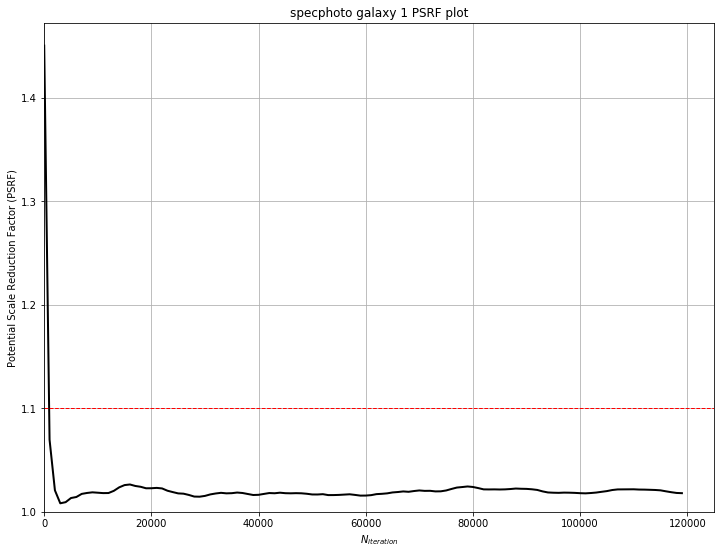

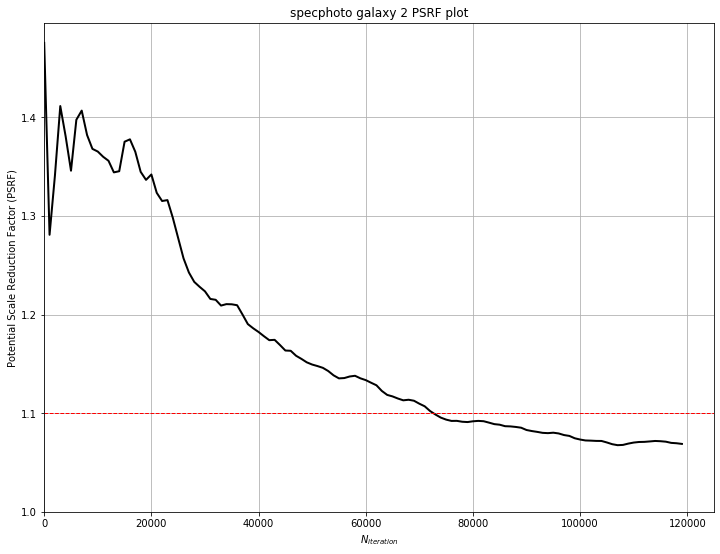

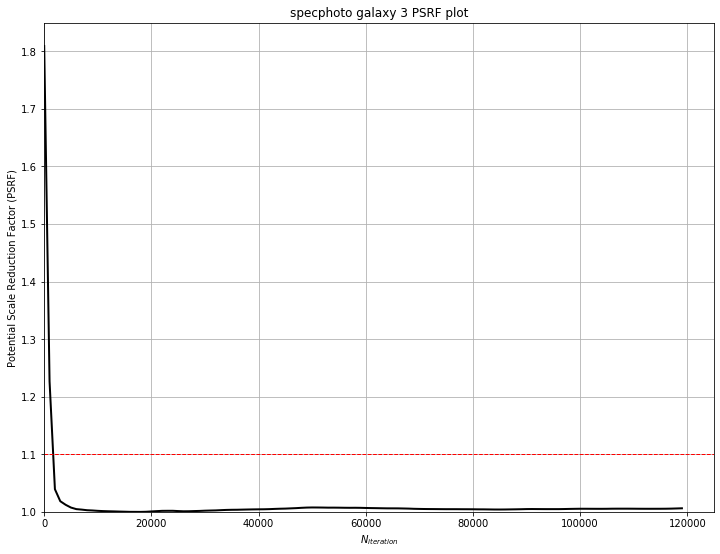

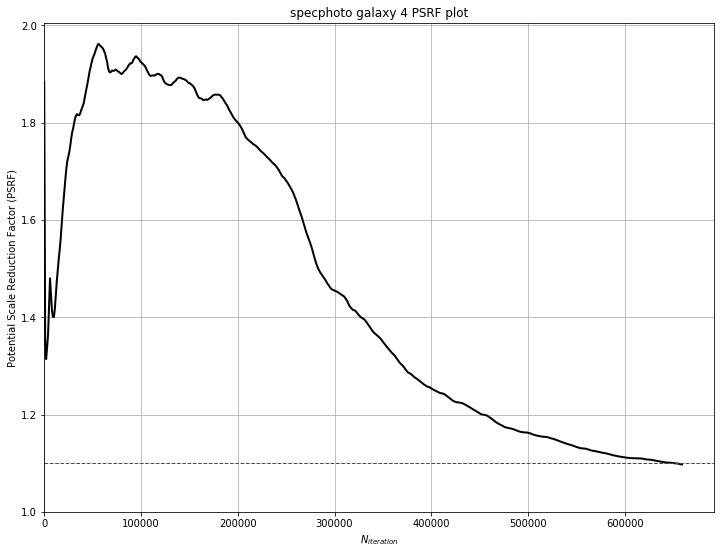

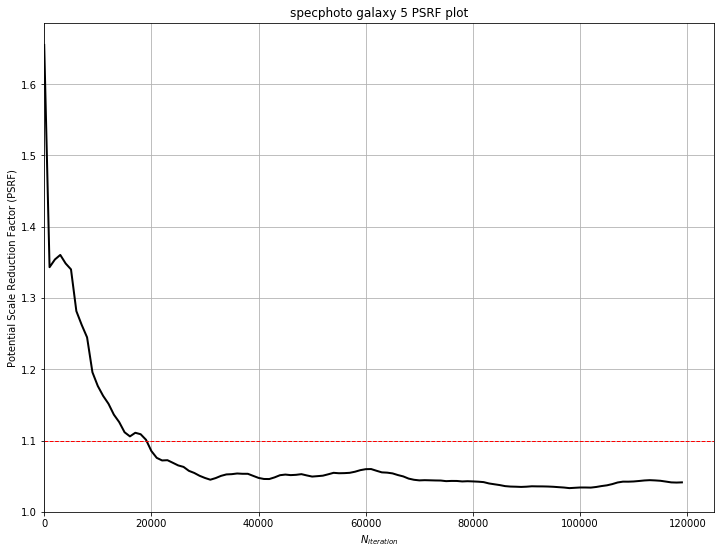

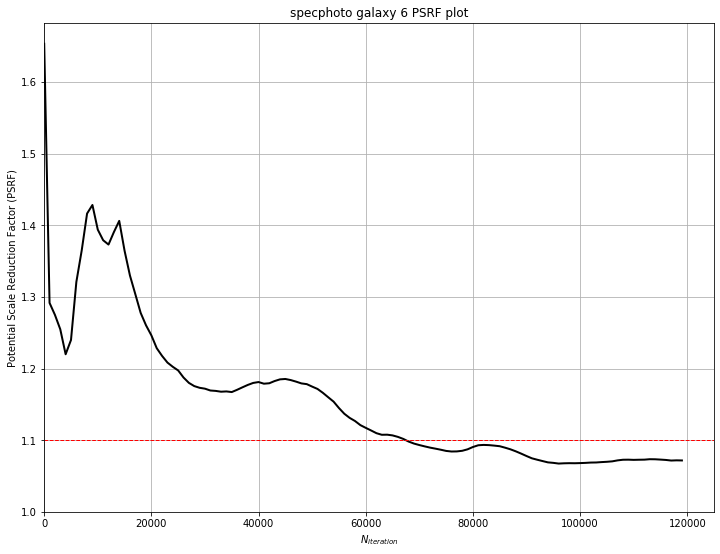

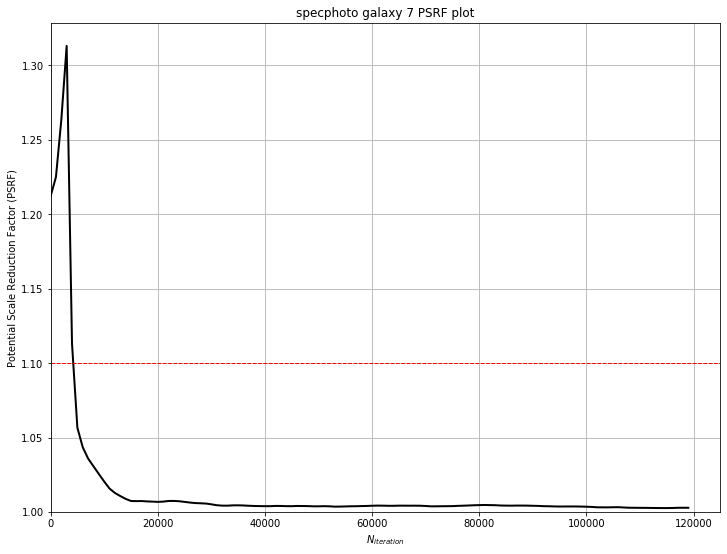

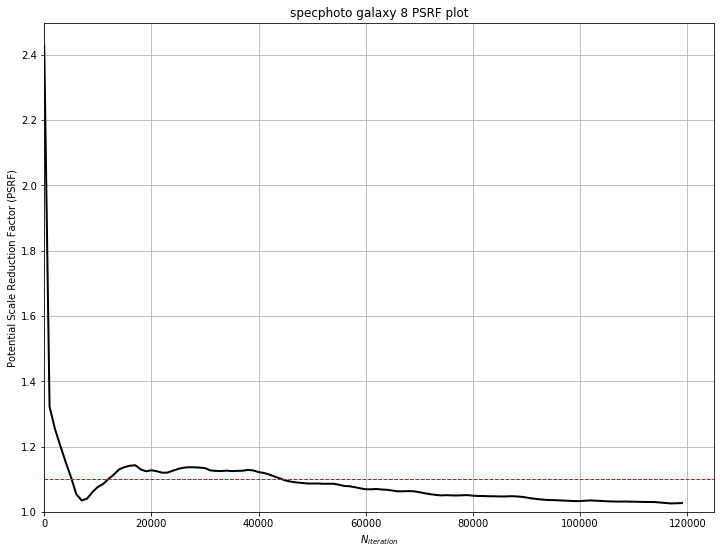

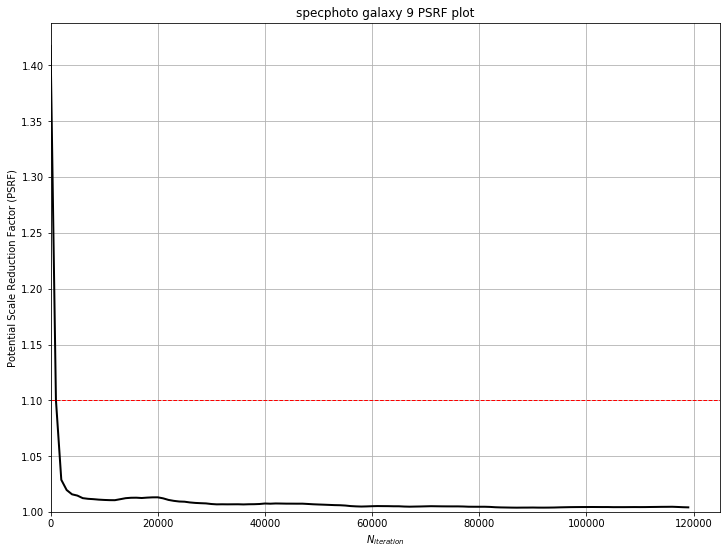

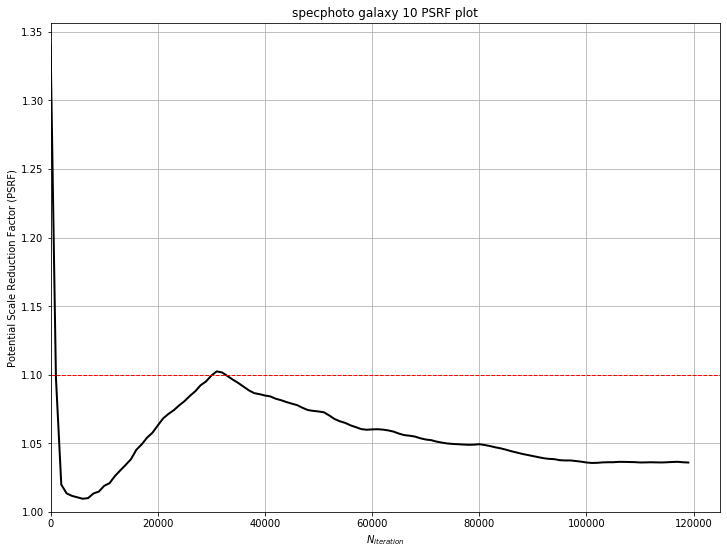

In [140]:
x15.PSRF_plot2('specphoto')

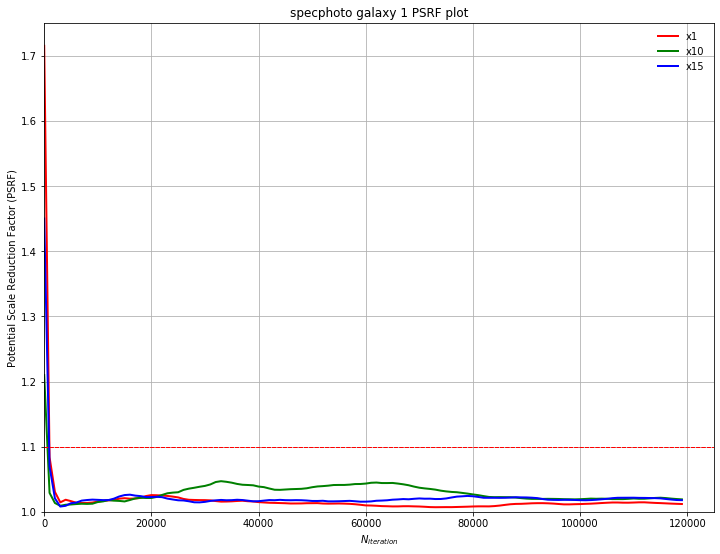

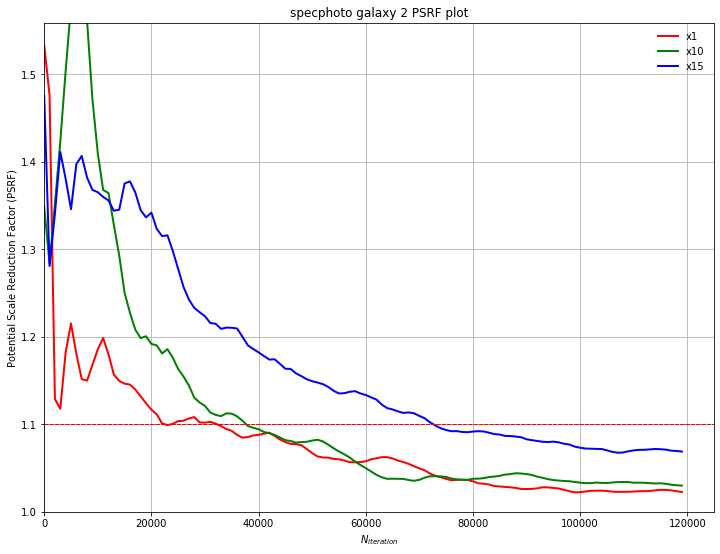

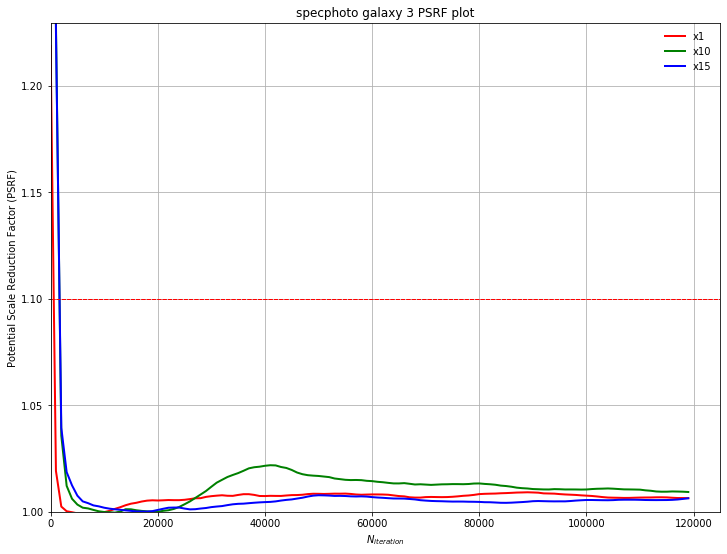

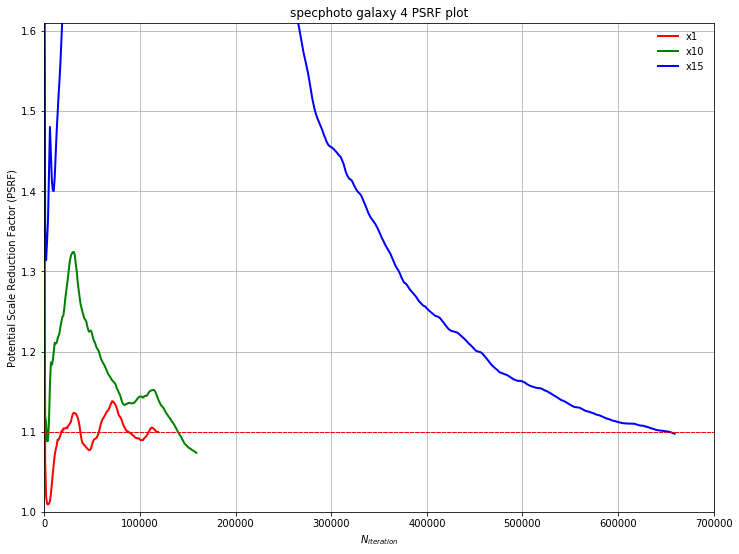

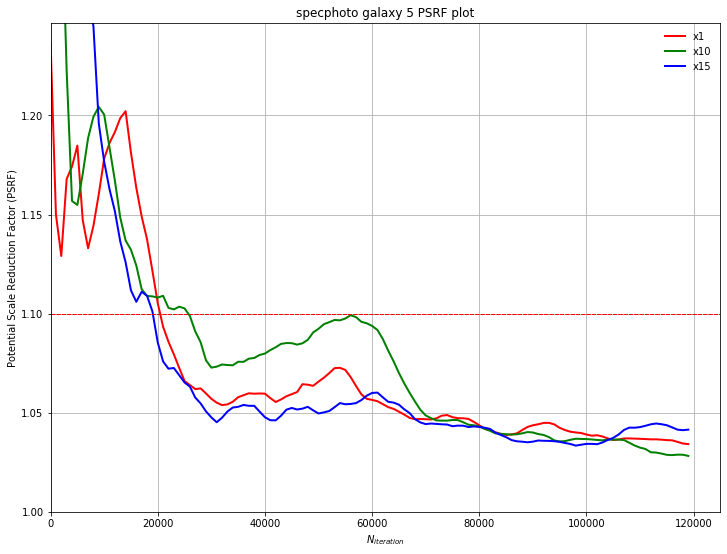

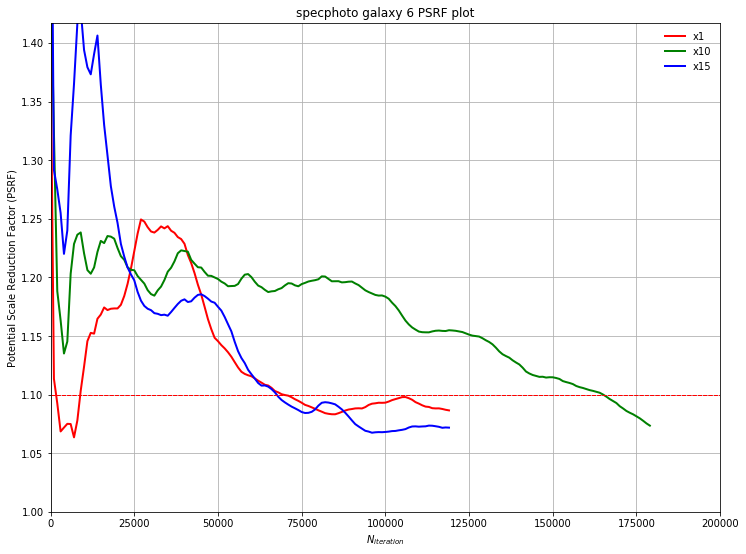

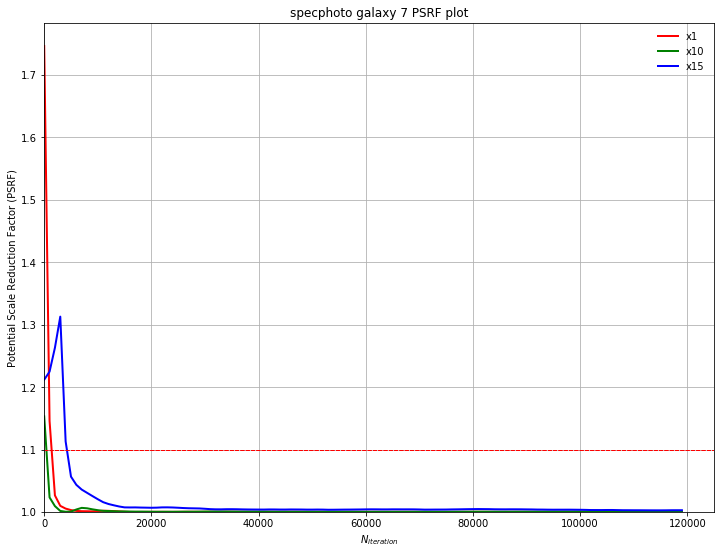

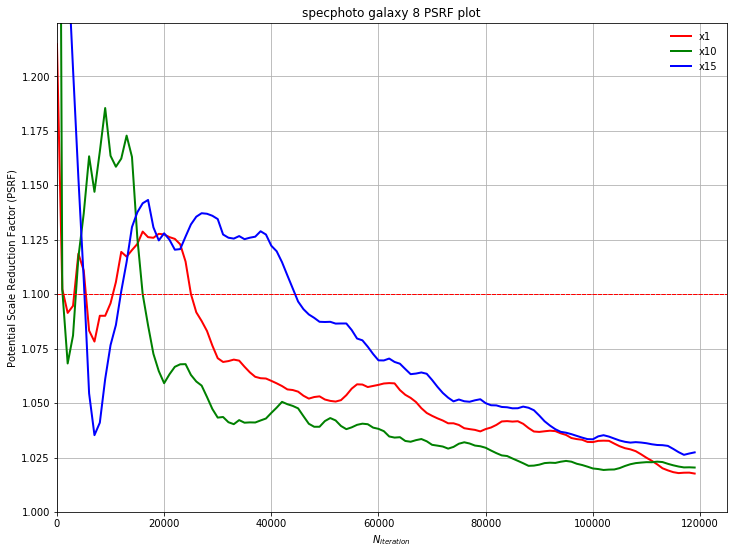

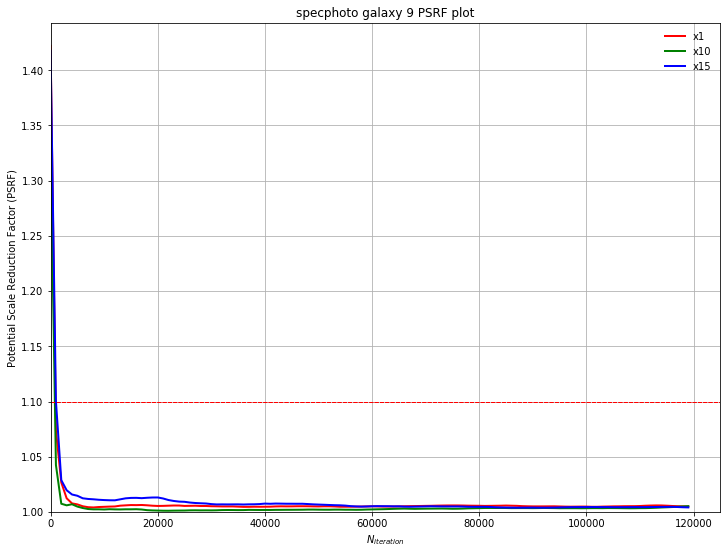

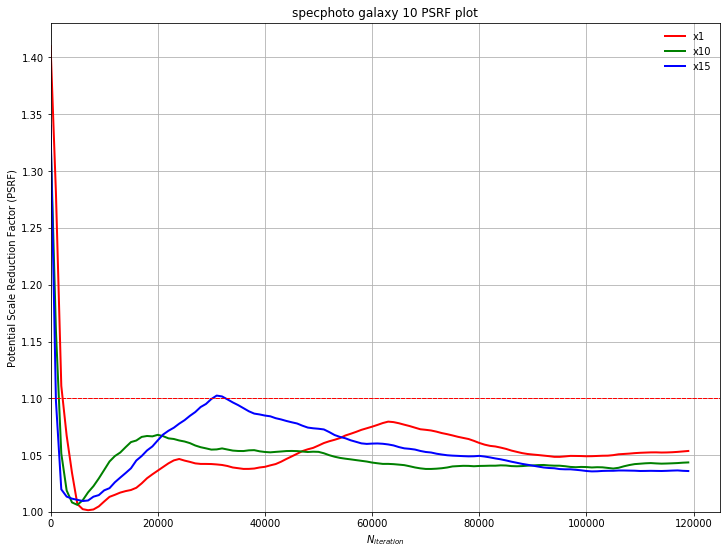

In [148]:
for i in range(10):
    plt.figure(figsize=(12,9))
    x1.igal_PSRF_plot(i,'specphoto', flag = 'x1', cl = 'r')
    x10.igal_PSRF_plot(i,'specphoto', flag = 'x10', cl = 'g')
    x15.igal_PSRF_plot(i,'specphoto', flag = 'x15', cl = 'b')
    if i ==3:
        plt.xlim(0,700000)
    if i ==5:
        plt.xlim(0,200000)
    plt.ylim(1.0,None)
    plt.legend(frameon = False)
    plt.savefig(f'SMT-PSRF {i}.pdf', format = 'pdf')
    plt.show()
# x10.PSRF_plot2('specphoto')
# plt.ylim(1.0,None)
# x15.PSRF_plot2('specphoto')
# plt.ylim(1.0,None)

In [53]:
def get_ylim(i):
    return ylim

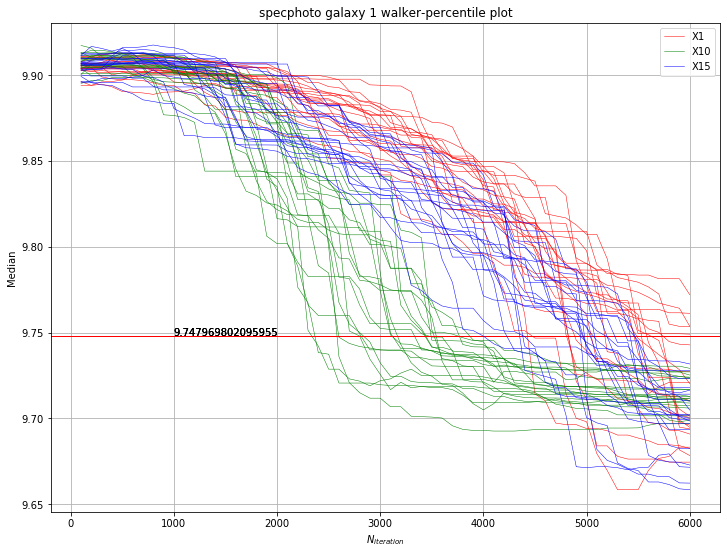

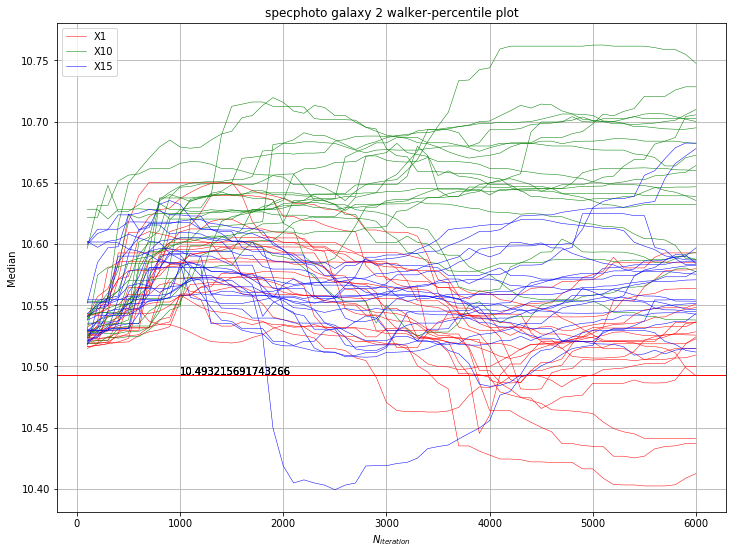

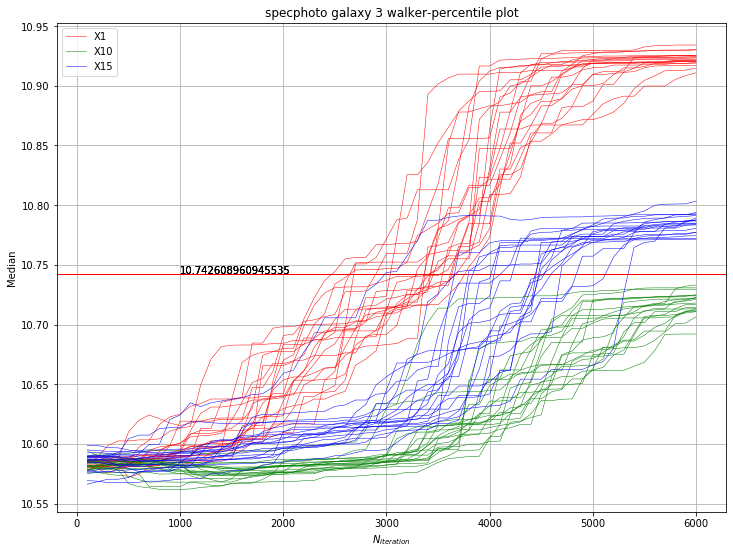

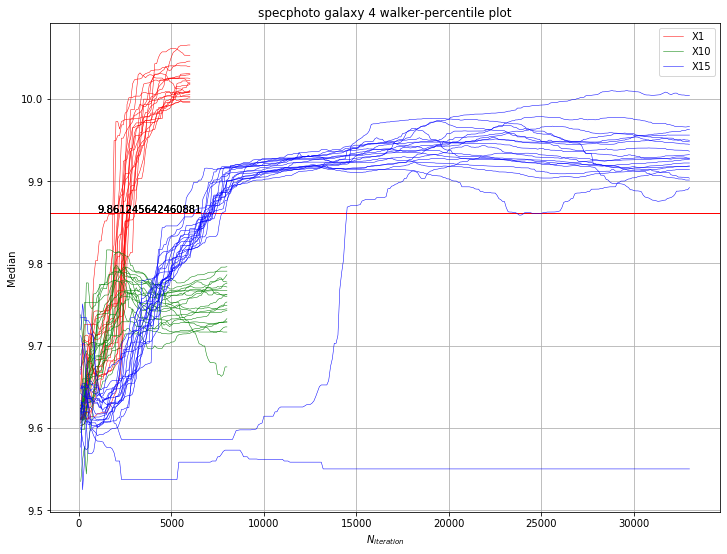

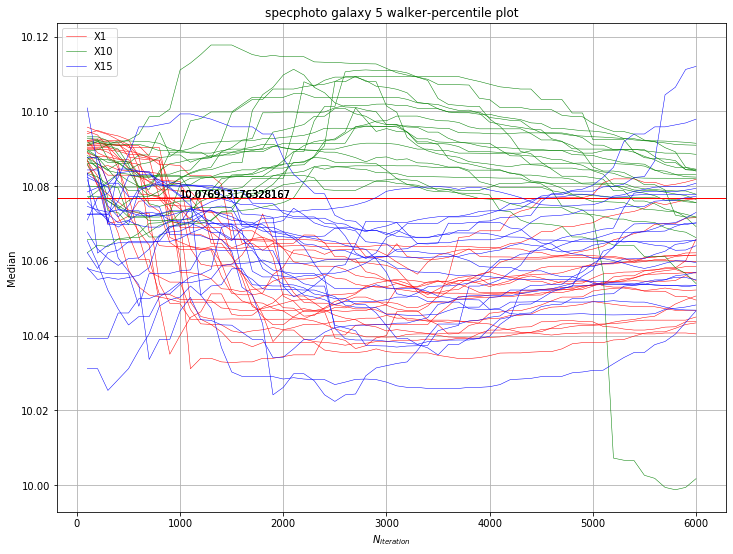

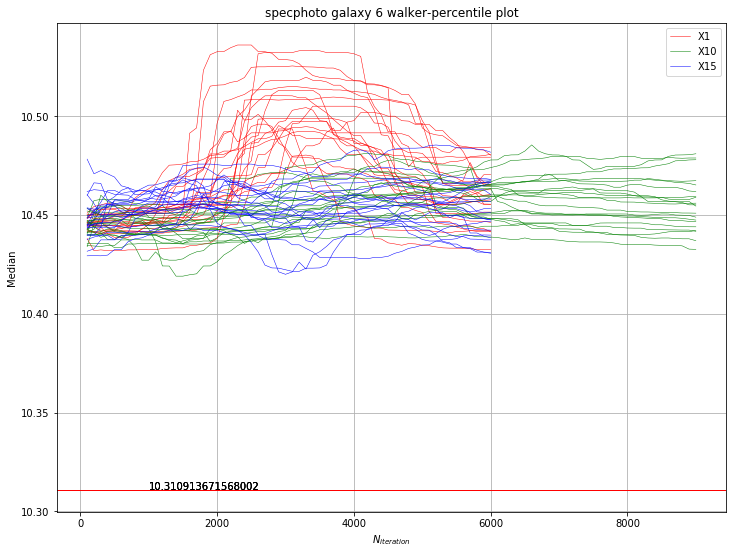

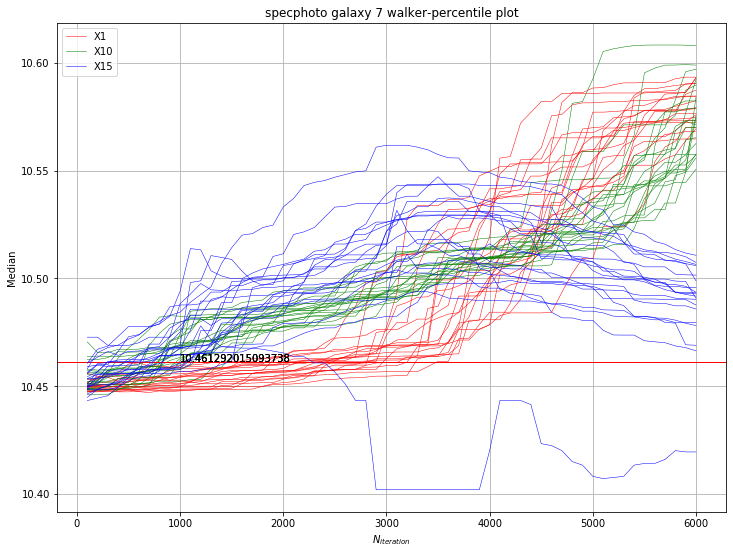

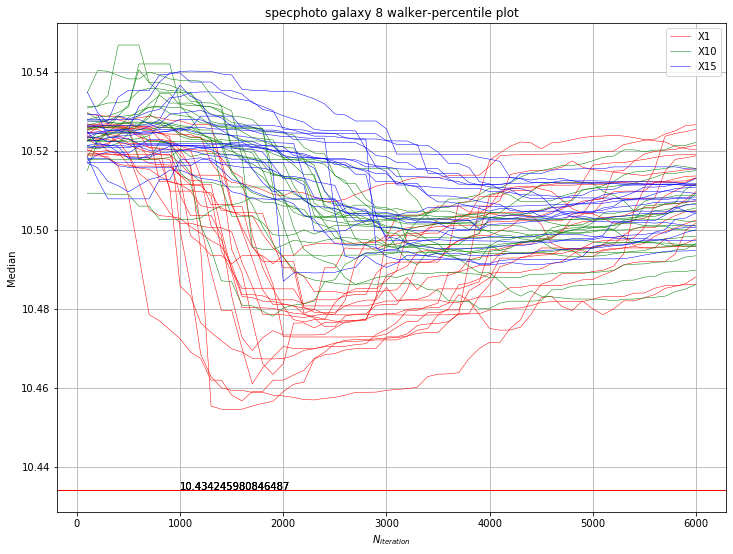

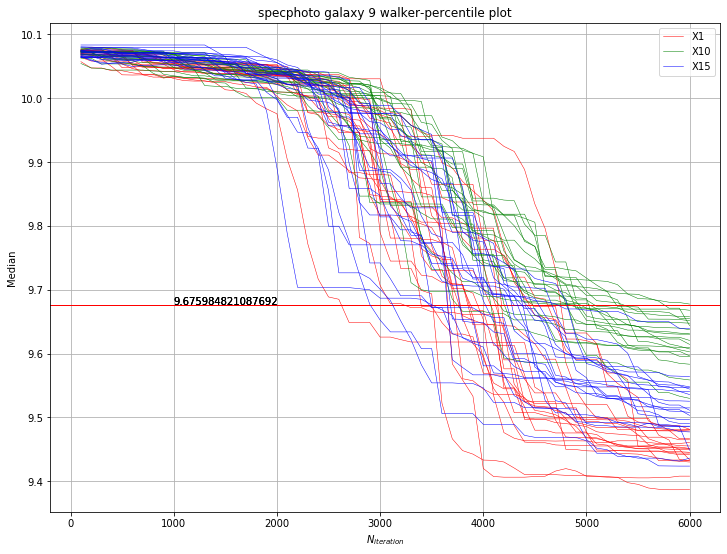

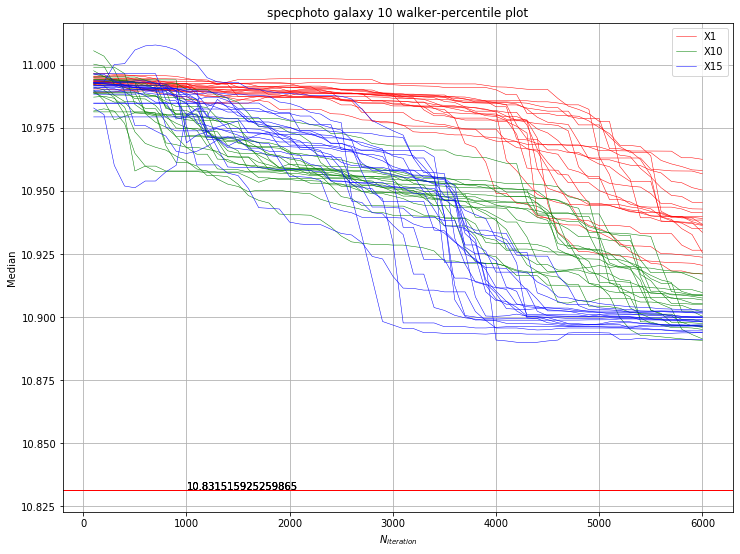

In [58]:
for i in range(10):
    plt.figure(figsize=(12,9))
    x1.igal_walker_perc_plot(i,'specphoto', step = 100, cl = ('r','X1'))
    x10.igal_walker_perc_plot(i,'specphoto', step = 100, cl = ('g', 'X10'))
    x15.igal_walker_perc_plot(i,'specphoto', step = 100, cl = ('b', 'X15'))
    plt.legend()
    plt.savefig(f'SMT igal{i}.pdf', format = 'pdf')
    plt.show()

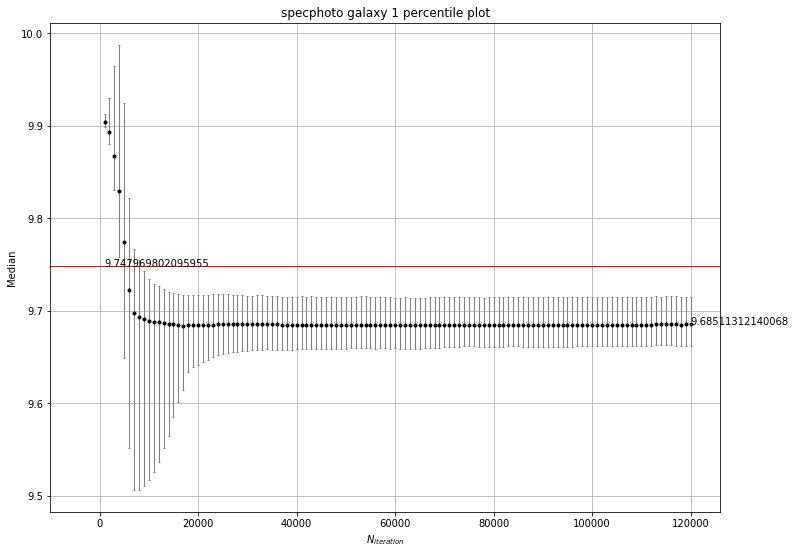

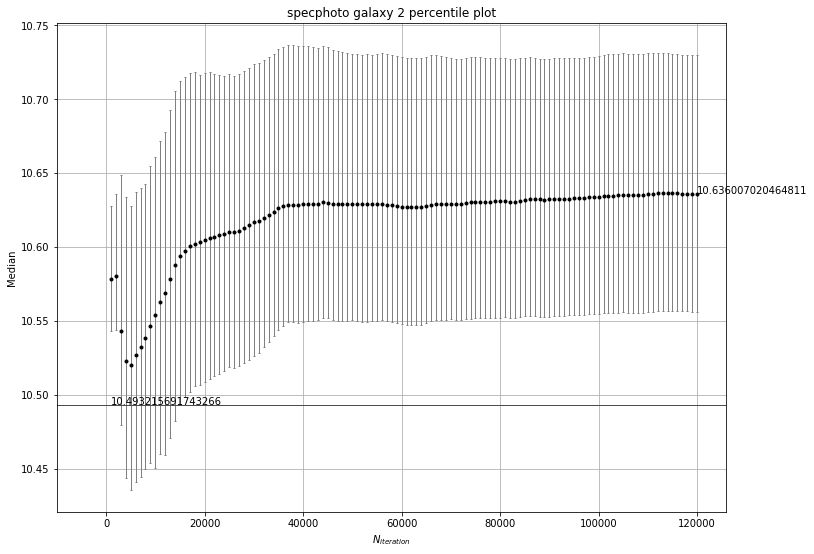

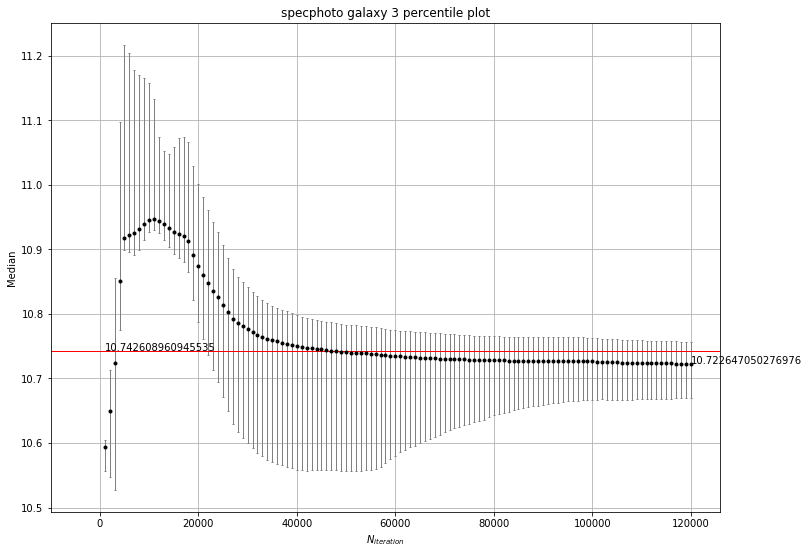

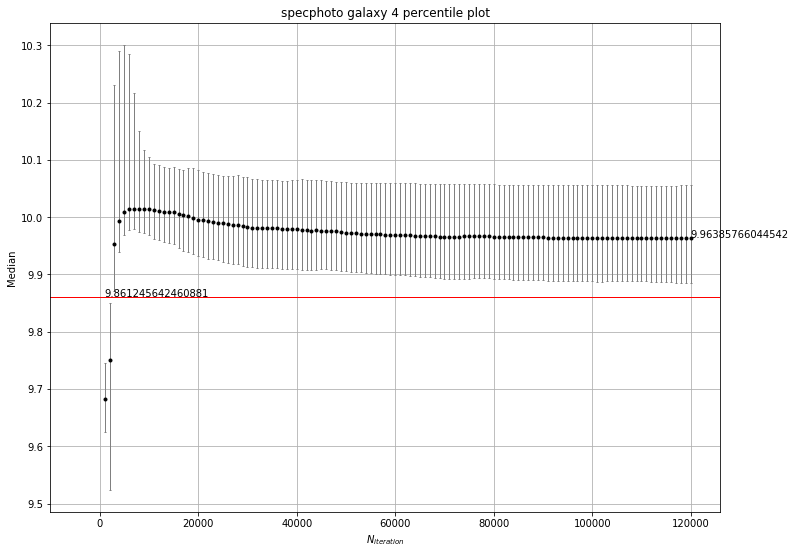

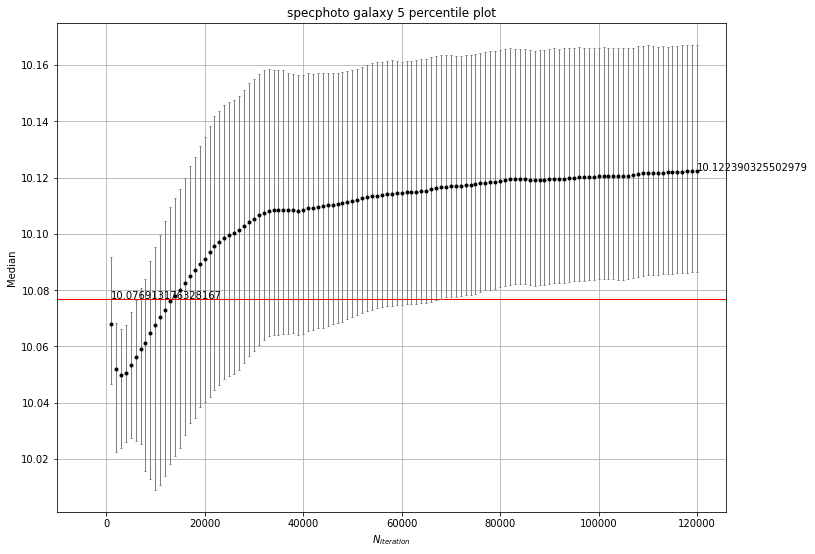

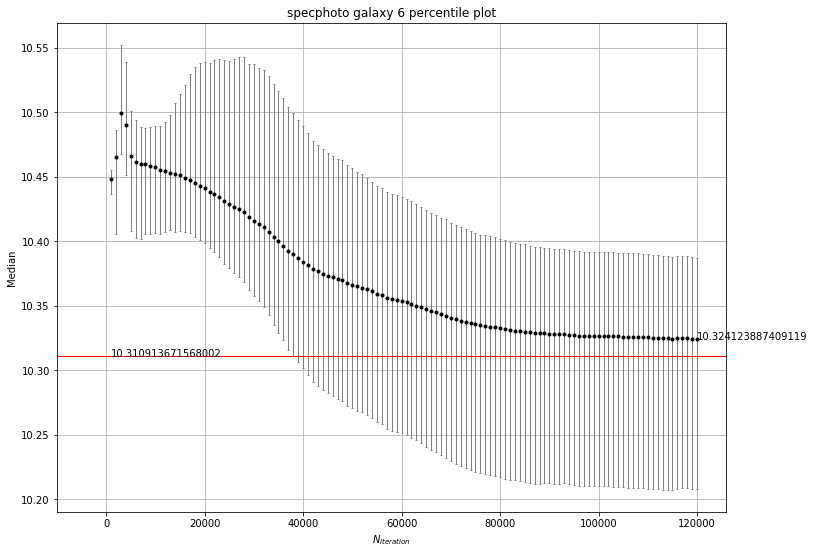

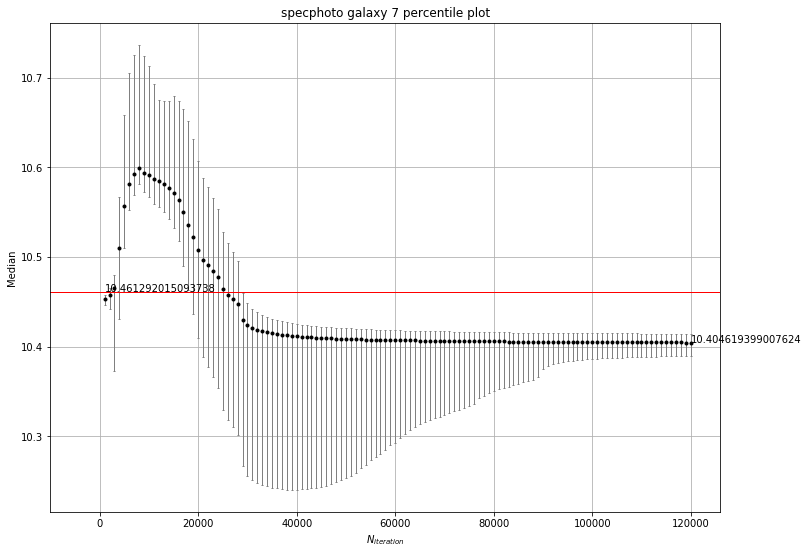

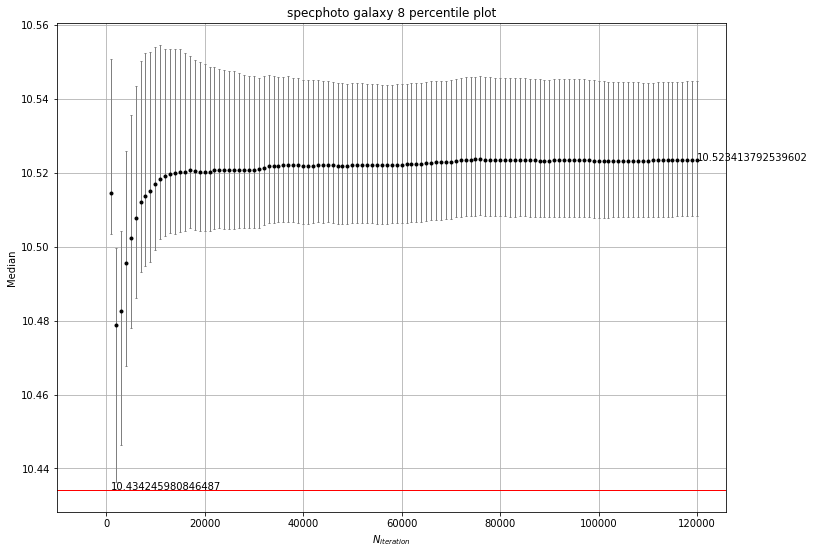

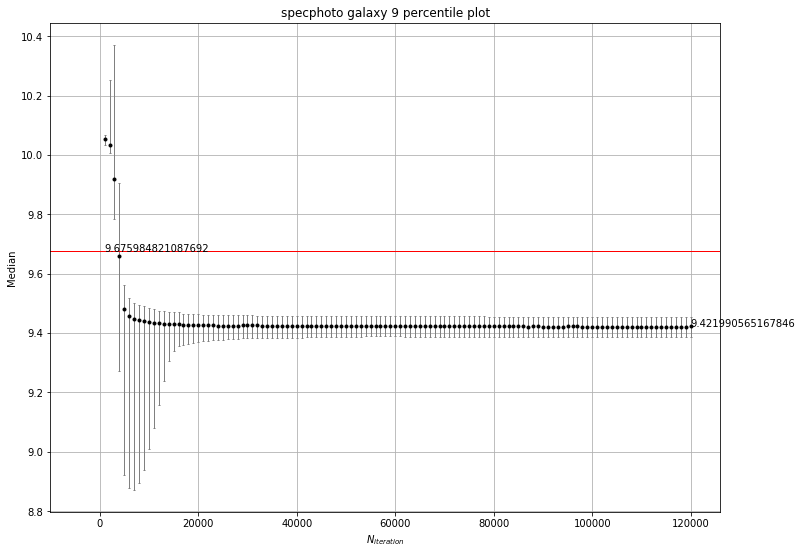

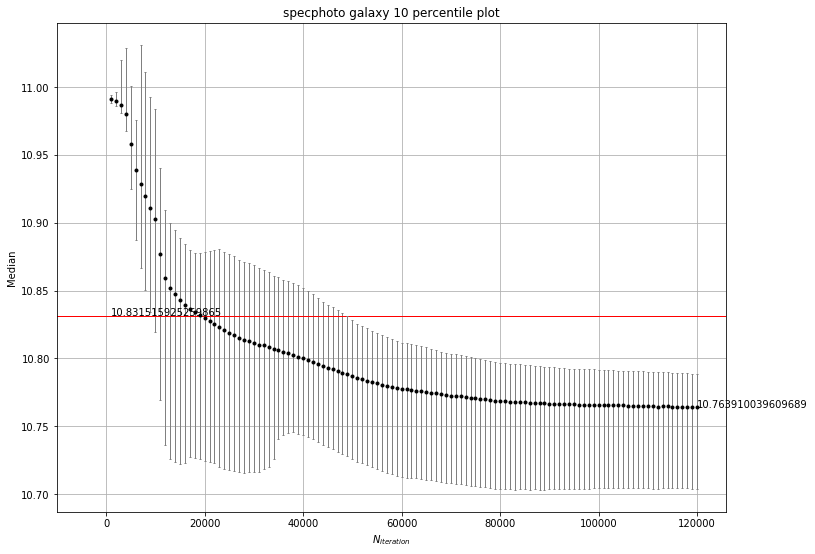

In [67]:
x1_e = x1.avg_perc_plot('specphoto')

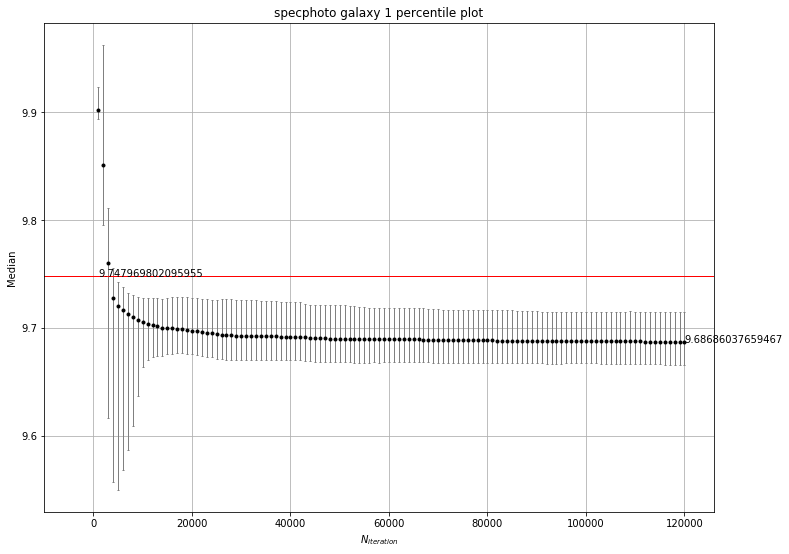

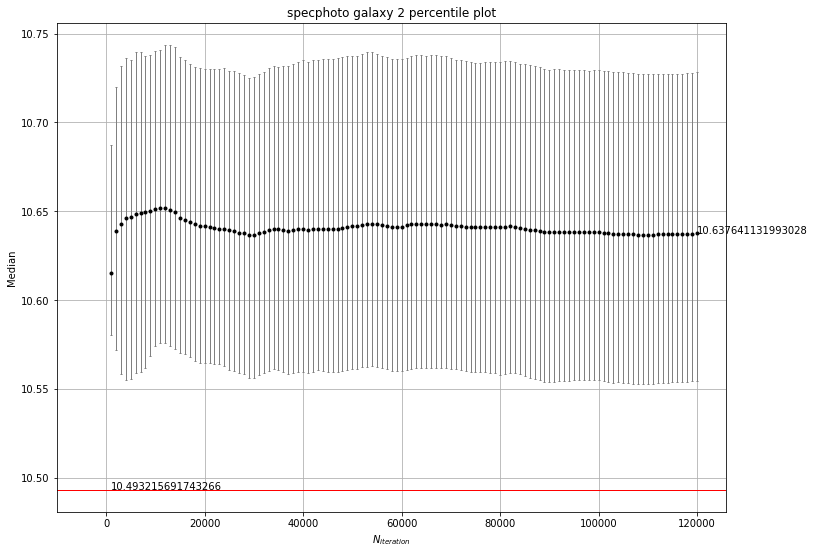

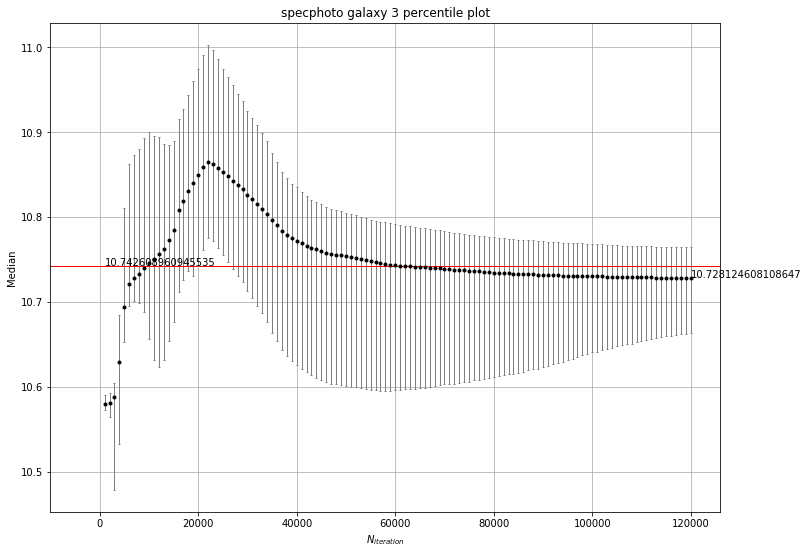

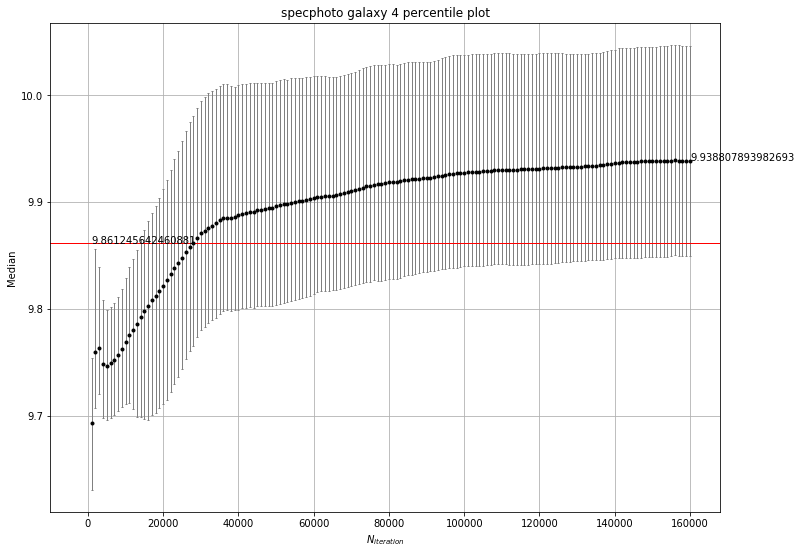

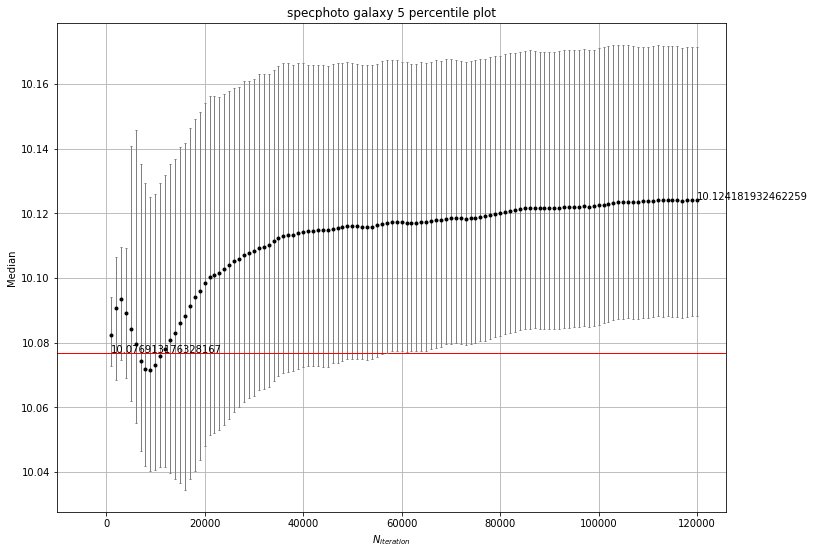

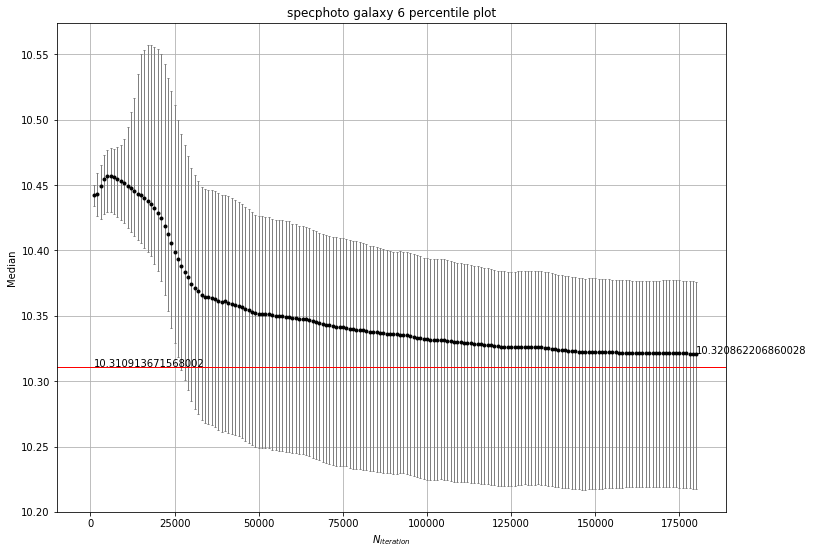

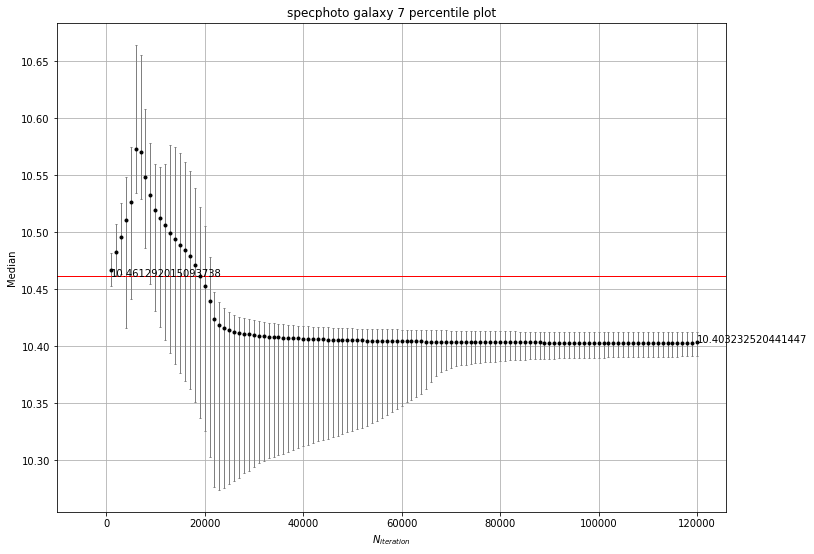

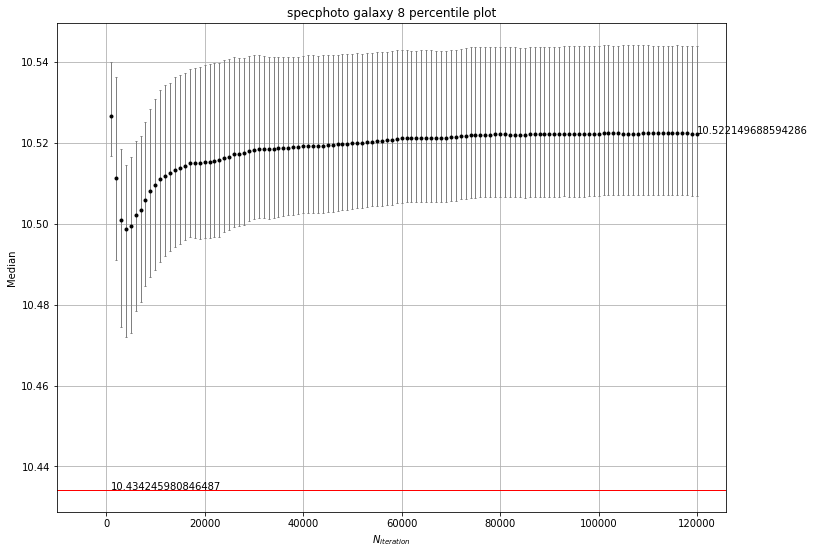

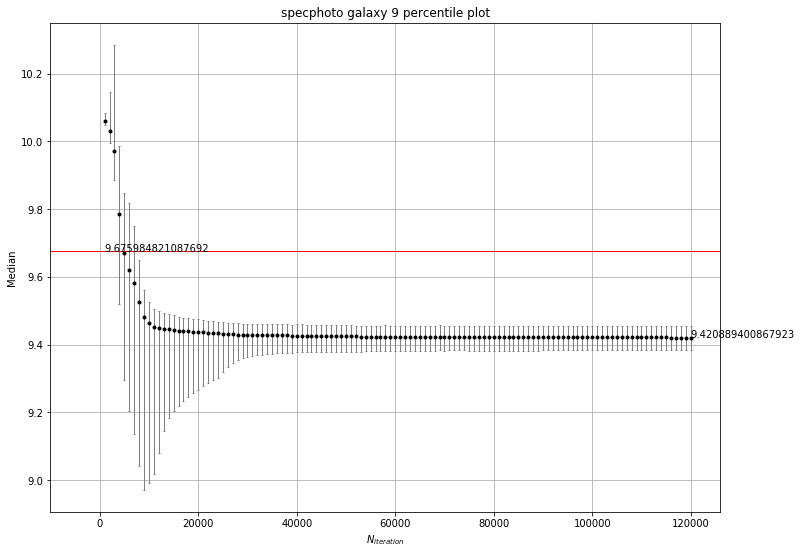

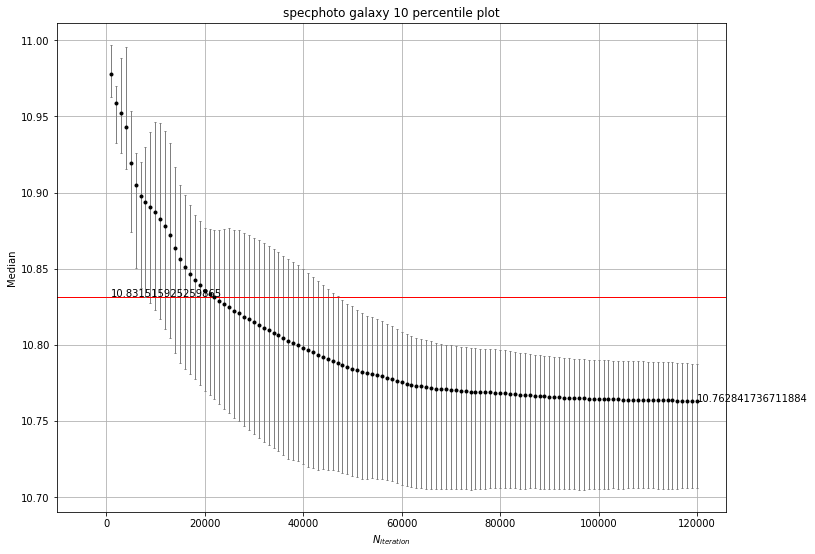

In [68]:
x10_pe = x10.avg_perc_plot('specphoto')

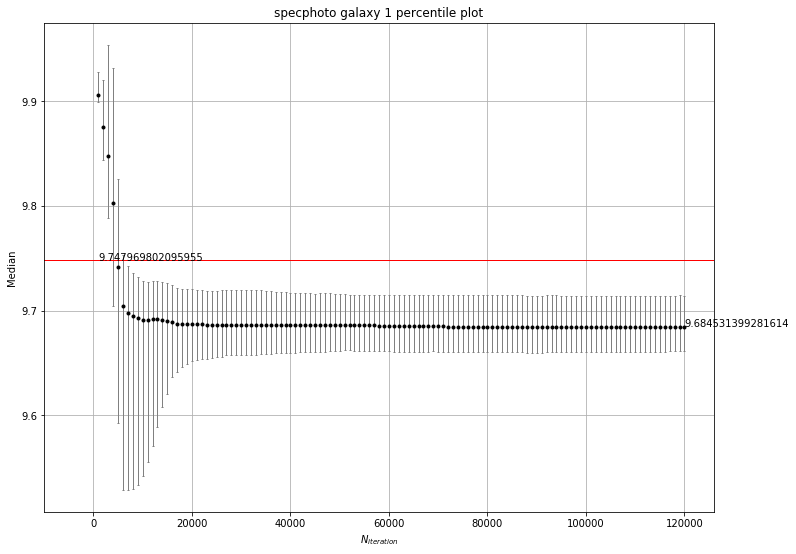

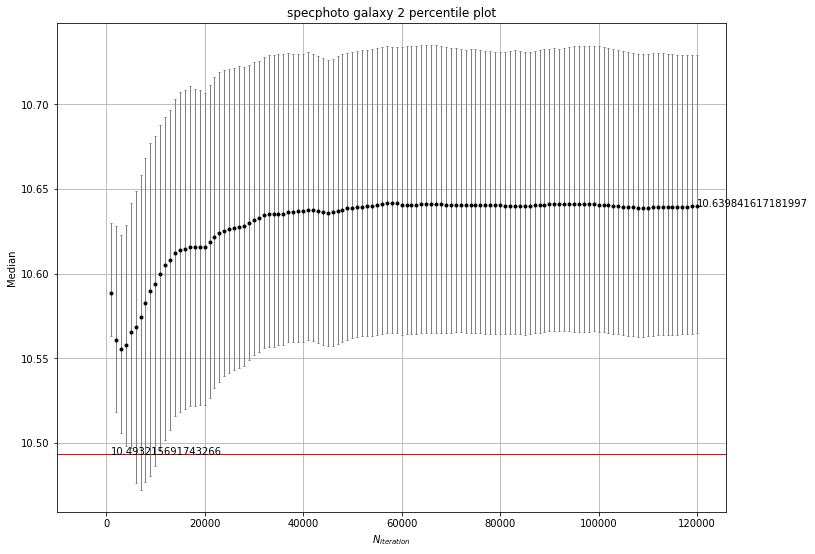

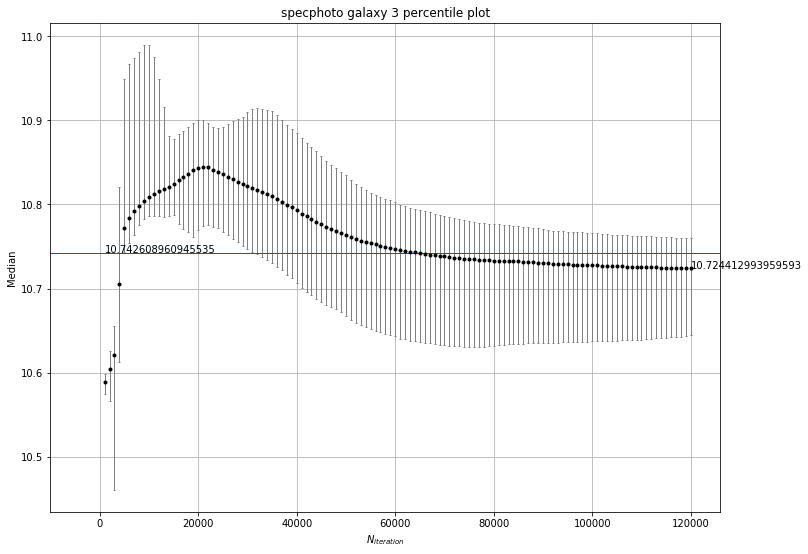

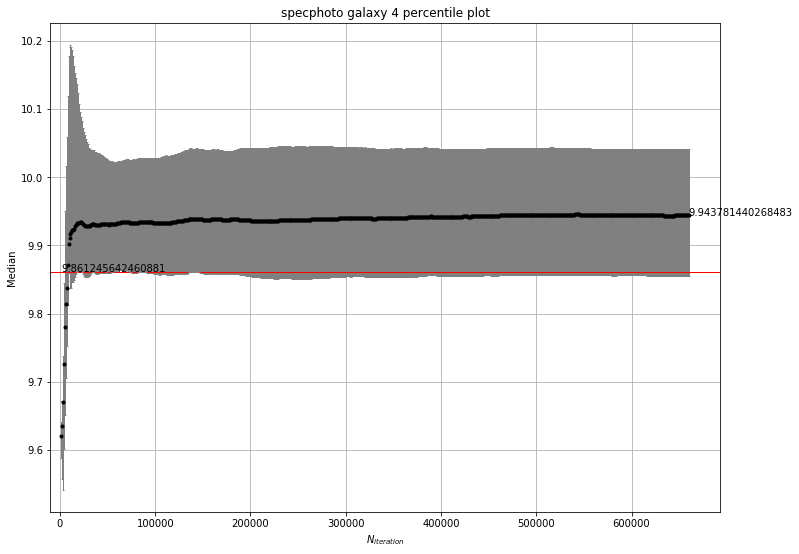

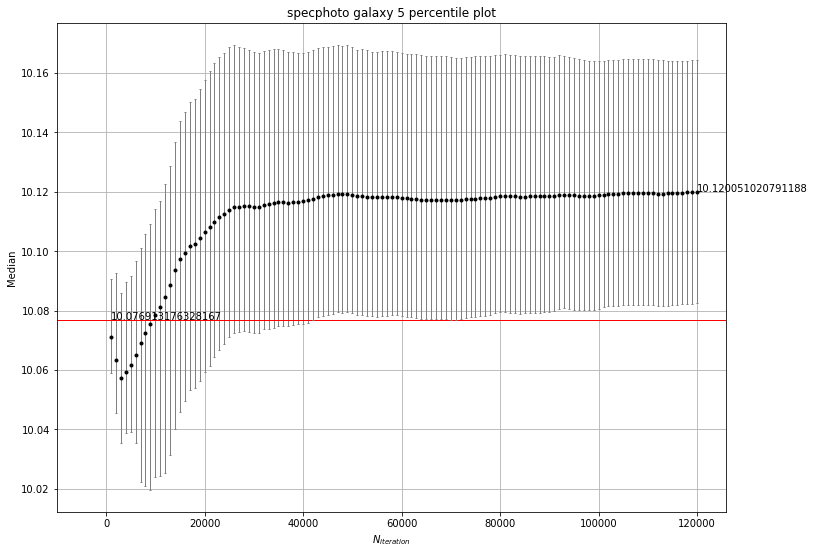

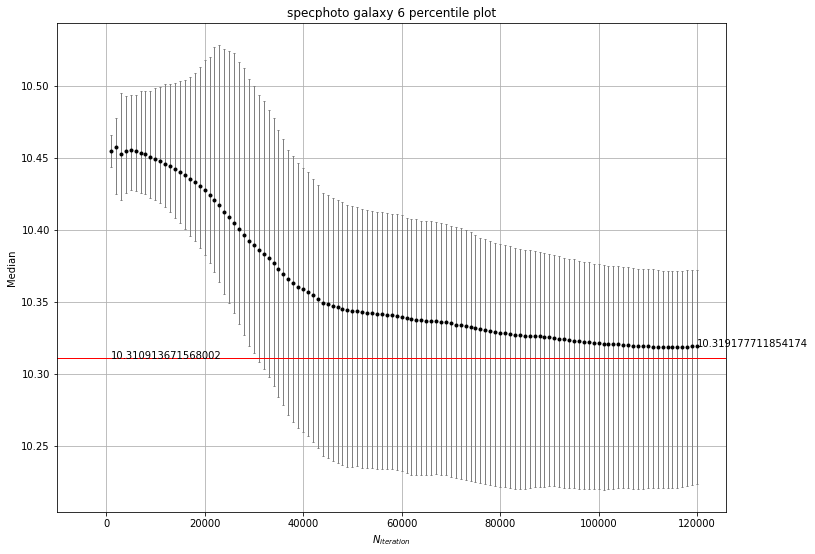

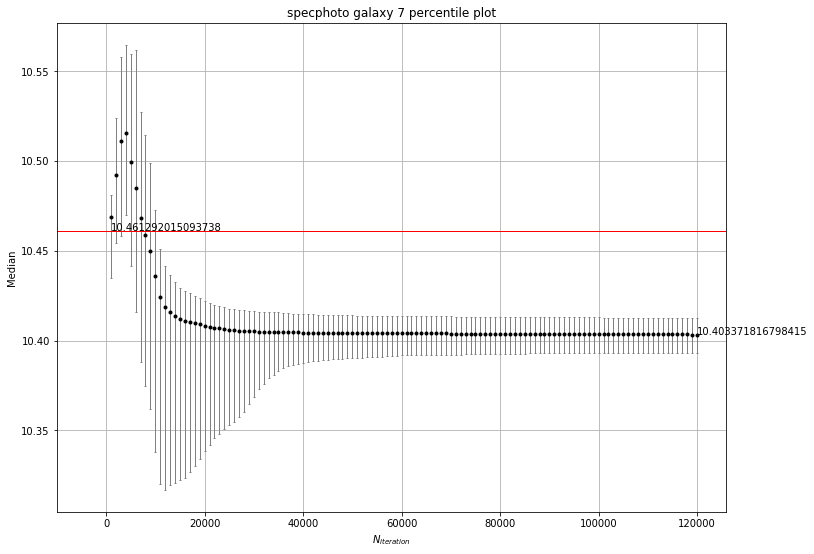

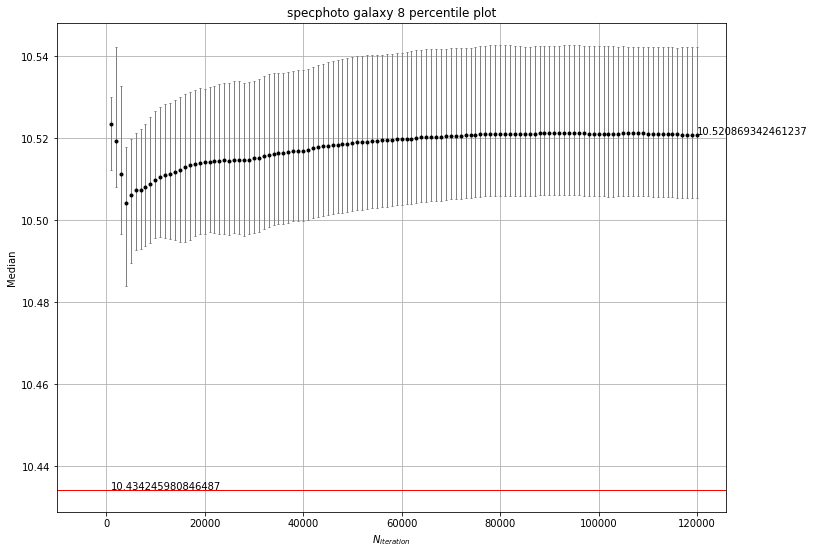

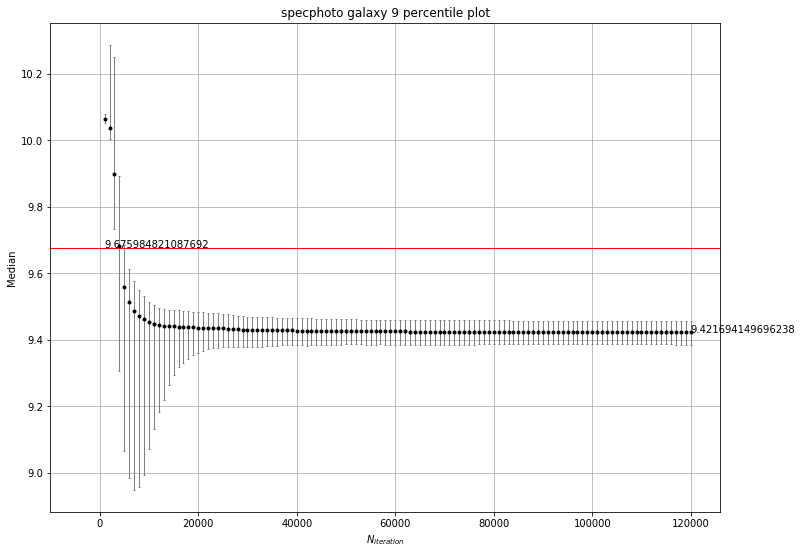

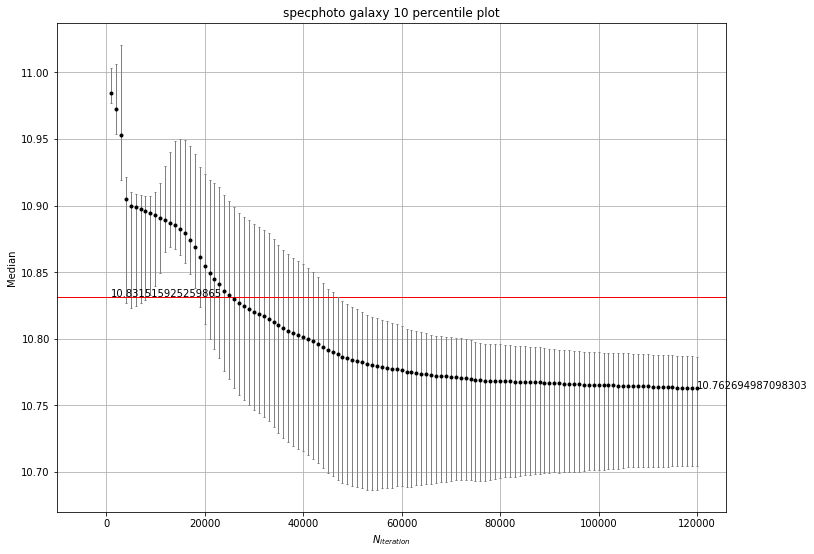

In [69]:
x15_pe = x15.avg_perc_plot('specphoto')

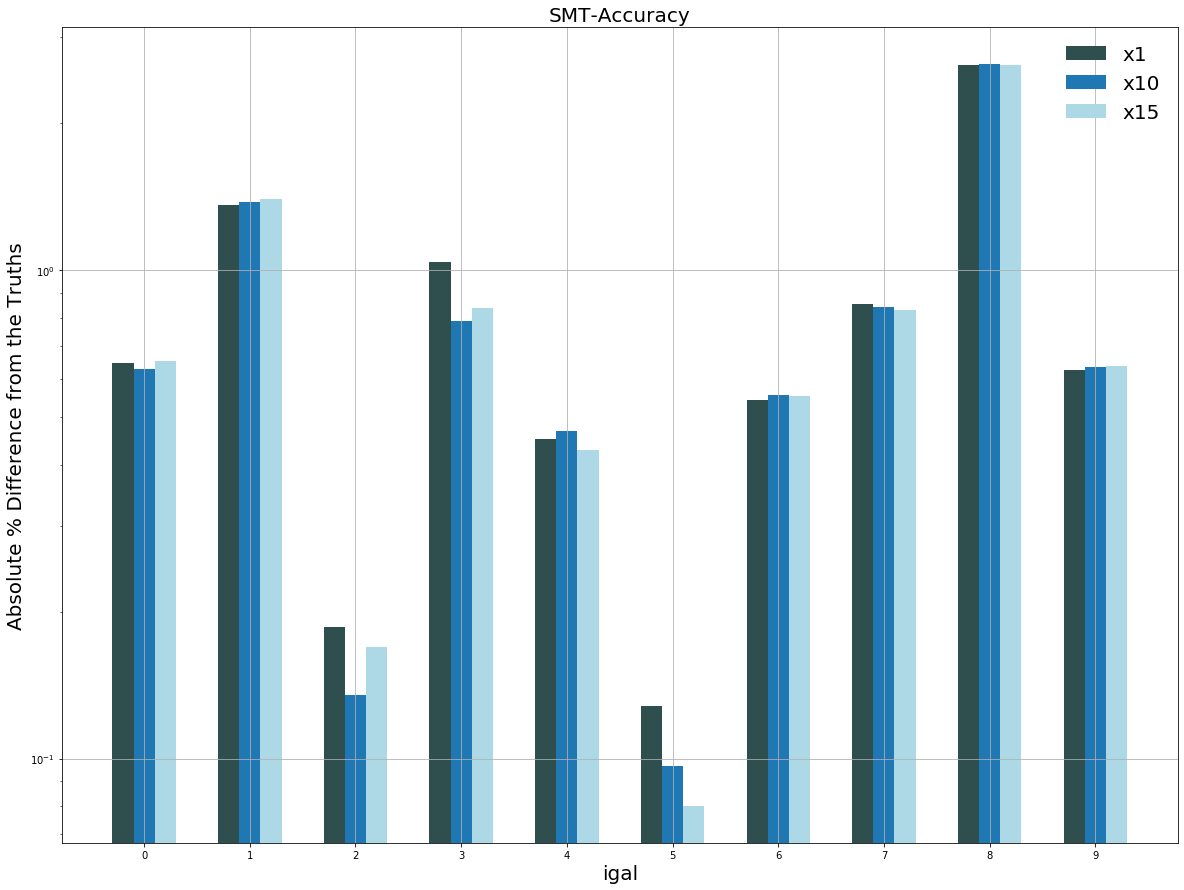

In [127]:
na = np.arange(10)
width = 0.2
plt.figure(figsize=(20,15))
plt.bar(na-width,np.abs(x1_e), width, label = 'x1', color = 'darkslategrey')
plt.bar(na,np.abs(x10_pe), width, label = 'x10')
plt.bar(na+width,np.abs(x15_pe),width,  label = 'x15', color = 'lightblue')
plt.grid()
plt.legend(frameon = False, fontsize = 20)
plt.xticks(na)
plt.yscale('log')
plt.xlabel('igal', fontsize = 20)
plt.ylabel('Absolute % Difference from the Truths', fontsize = 20)
plt.title('SMT-Accuracy', fontsize = 20)
plt.savefig('SMT-Acc.pdf', format = 'pdf')
plt.show()
